<a href="https://colab.research.google.com/github/AShipulin/Train-Scheduler-Simulator-SimPy/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3_%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%B3%D0%B0%D0%BD%D1%82%D0%B0_(SimPy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка SimPy

In [ ]:
!pip install -U simpy

## Первая модель

SimPy — это Python фреймворк для процессо-ориентированной дискретно-событийной системы моделирования. Он был разработан для создания асинхронных сетей и мультиагентных систем, как с моделируемым, так и с реальным взаимодействием.

In [ ]:
# Импортировать библиотеку simpy
import simpy

In [ ]:
# Функция выполнения операций по заявке
def order(env):

    # Выполнение

    print(f'{env.now:2.0f}, Мониторинг прибытия груж. конт.*')
    yield env.timeout(10)

    print(f'{env.now:2.0f}, Добавление конт. в дисп. график')
    yield env.timeout(3)

    print(f'{env.now:2.0f}, Уведомление о прибытии конт. клиента')
    yield env.timeout(1)

In [ ]:
# Иницилизация среды выпполнения имитационной модели
env = simpy.Environment(initial_time=0)

# В среду выполнения помещаем процесс с заявкой
env.process(order(env))

# Запускаме моделирование на 100 минут
env.run(until=100)

 0, Мониторинг прибытия груж. конт.*
10, Добавление конт. в дисп. график
13, Уведомление о прибытии конт. клиента


## Выполним три заявки

In [ ]:
# Иницилизация среды выпполнения имитационной модели
env = simpy.Environment(initial_time=0)

# В среду выполнения помещаем три процесса
p1 = env.process(order(env))
p2 = env.process(order(env))
p2 = env.process(order(env))

# Запускаме моделирование на 100 минут
env.run(until=50)

 0, Мониторинг прибытия груж. конт.*
 0, Мониторинг прибытия груж. конт.*
 0, Мониторинг прибытия груж. конт.*
10, Добавление конт. в дисп. график
10, Добавление конт. в дисп. график
10, Добавление конт. в дисп. график
13, Уведомление о прибытии конт. клиента
13, Уведомление о прибытии конт. клиента
13, Уведомление о прибытии конт. клиента


## Доработаем заявку

In [ ]:
def oper(env, order, oper, wait, dur):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполнение
    put = env.now # Время помещения в очередь
    yield env.timeout(dur)
    print(f'{put:2.0f}, {env.now:2.0f}, {order}, {oper} - {dur}')

def order(env, order, wait):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполняем операции
    yield env.process(oper(env, order, 'Мониторинг прибытия груж. конт.*', 0, 10))
    yield env.process(oper(env, order, 'Добавление конт. в дисп. график', 0, 3))
    yield env.process(oper(env, order, 'Уведомление о прибытии конт. клиента', 0, 1))

In [ ]:
# Иницилизация среды выпполнения имитационной модели
env = simpy.Environment(initial_time=0)

# В среду выполнения помещаем три процесса
p1 = env.process(order(env, "Заявка 1", 0))
p2 = env.process(order(env, "Заявка 2", 5))
p3 = env.process(order(env, "Заявка 3", 10))

# Запускаме моделирование на 100 минут
env.run(until=50)

 0, 10, Заявка 1, Мониторинг прибытия груж. конт.* - 10
10, 13, Заявка 1, Добавление конт. в дисп. график - 3
13, 14, Заявка 1, Уведомление о прибытии конт. клиента - 1
 5, 15, Заявка 2, Мониторинг прибытия груж. конт.* - 10
15, 18, Заявка 2, Добавление конт. в дисп. график - 3
18, 19, Заявка 2, Уведомление о прибытии конт. клиента - 1
10, 20, Заявка 3, Мониторинг прибытия груж. конт.* - 10
20, 23, Заявка 3, Добавление конт. в дисп. график - 3
23, 24, Заявка 3, Уведомление о прибытии конт. клиента - 1


## Добавим ресурс


In [ ]:
def oper(env, manager, order, oper, wait, dur):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполнение
    put = env.now # Время помещения в очередь
    with manager.request() as req: # Запрос особождения ресурса
        yield req              # Ждем осовбождение ресурса
        beg = env.now          # Начало выполнения
        delay = beg - put      # Задержка
        yield env.timeout(dur) # Время выполнения
        end = env.now          # Завершение выполнения
        print(f'{put:2.0f}, {beg:2.0f}, {end:2.0f}, {delay}, {len(manager.queue)}, {order}, {oper} - {dur}')

def order(env, manager, order, wait):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполняем операции
    yield env.process(oper(env, manager, order, 'Мониторинг прибытия груж. конт.*', 0, 10))
    yield env.process(oper(env, manager, order, 'Добавление конт. в дисп. график', 0, 3))
    yield env.process(oper(env, manager, order, 'Уведомление о прибытии конт. клиента', 0, 1))

In [ ]:
# Иницилизация среды выпполнения имитационной модели
env = simpy.Environment(initial_time=0)

# Создаем ресурс - менеджер
num_managers = 1 # число менеджеров (взимо заменяемых)
manager = simpy.PriorityResource(env, num_managers)

# В среду выполнения помещаем три процесса
p1 = env.process(order(env, manager, "Заявка 1", 0))
p2 = env.process(order(env, manager, "Заявка 2", 5))
p3 = env.process(order(env, manager, "Заявка 3", 10))

# Запускаме моделирование на 100 минут
env.run(until=50)

 0,  0, 10, 0, 1, Заявка 1, Мониторинг прибытия груж. конт.* - 10
 5, 10, 20, 5, 2, Заявка 2, Мониторинг прибытия груж. конт.* - 10
10, 20, 30, 10, 2, Заявка 3, Мониторинг прибытия груж. конт.* - 10
10, 30, 33, 20, 2, Заявка 1, Добавление конт. в дисп. график - 3
20, 33, 36, 13, 2, Заявка 2, Добавление конт. в дисп. график - 3
30, 36, 39, 6, 2, Заявка 3, Добавление конт. в дисп. график - 3
33, 39, 40, 6, 2, Заявка 1, Уведомление о прибытии конт. клиента - 1
36, 40, 41, 4, 1, Заявка 2, Уведомление о прибытии конт. клиента - 1
39, 41, 42, 2, 0, Заявка 3, Уведомление о прибытии конт. клиента - 1


## Добавим логи

In [ ]:
def oper(env, manager, order, oper, wait, dur):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполнение
    put = env.now # Время помещения в очередь
    with manager.request() as req: # Запрос особождения ресурса
        yield req              # Ждем осовбождение ресурса
        beg = env.now          # Начало выполнения
        delay = beg - put      # Задержка
        yield env.timeout(dur) # Время выполнения
        end = env.now          # Завершение выполнения
        #print(f'{put:2.0f}, {beg:2.0f}, {end:2.0f}, {delay}, {len(manager.queue)}, {order}, {oper} - {dur}')
        # Логи выполнения
        data_log.append([put, beg, end, delay, len(manager.queue), order, oper])

def order(env, manager, order, wait):
    # Ждем запуска
    yield env.timeout(wait)
    # Выполняем операции
    yield env.process(oper(env, manager, order, '1. Мониторинг прибытия груж. конт.*', 0, 10))
    yield env.process(oper(env, manager, order, '2. Добавление конт. в дисп. график', 0, 3))
    yield env.process(oper(env, manager, order, '3. Уведомление о прибытии конт. клиента', 0, 1))

In [ ]:
# Иницилизация среды выпполнения имитационной модели
env = simpy.Environment(initial_time=0)

# Создаем ресурс - менеджер
num_managers = 2 # число менеджеров (взимо заменяемых)
manager = simpy.PriorityResource(env, num_managers)

# В среду выполнения помещаем три процесса
p1 = env.process(order(env, manager, "Заявка 1", 0))
p2 = env.process(order(env, manager, "Заявка 2", 5))
p3 = env.process(order(env, manager, "Заявка 3", 10))

# Лог
data_log = []

# Запускаме моделирование на 100 минут
env.run(until=50)

# Печать лога
data_log

[[0, 0, 10, 0, 0, 'Заявка 1', '1. Мониторинг прибытия груж. конт.*'],
 [5, 5, 15, 0, 1, 'Заявка 2', '1. Мониторинг прибытия груж. конт.*'],
 [10, 15, 18, 5, 1, 'Заявка 1', '2. Добавление конт. в дисп. график'],
 [10, 10, 20, 0, 1, 'Заявка 3', '1. Мониторинг прибытия груж. конт.*'],
 [15, 18, 21, 3, 1, 'Заявка 2', '2. Добавление конт. в дисп. график'],
 [18, 20, 21, 2, 1, 'Заявка 1', '3. Уведомление о прибытии конт. клиента'],
 [21, 21, 22, 0, 0, 'Заявка 2', '3. Уведомление о прибытии конт. клиента'],
 [20, 21, 24, 1, 0, 'Заявка 3', '2. Добавление конт. в дисп. график'],
 [24, 24, 25, 0, 0, 'Заявка 3', '3. Уведомление о прибытии конт. клиента']]

## Научимся читать логи

Для это испольуем билиотеку pandas

In [ ]:
import pandas as pd # библиотека для работы с данными
pd.DataFrame(data_log, columns=["put", "beg", "end", "delay", "queue", "order", "oper"])

,put,beg,end,delay,queue,order,oper
0,0,0,10,0,0,Заявка 1,1. Мониторинг прибытия груж. конт.*
1,5,5,15,0,1,Заявка 2,1. Мониторинг прибытия груж. конт.*
2,10,15,18,5,1,Заявка 1,2. Добавление конт. в дисп. график
3,10,10,20,0,1,Заявка 3,1. Мониторинг прибытия груж. конт.*
4,15,18,21,3,1,Заявка 2,2. Добавление конт. в дисп. график
5,18,20,21,2,1,Заявка 1,3. Уведомление о прибытии конт. клиента
6,21,21,22,0,0,Заявка 2,3. Уведомление о прибытии конт. клиента
7,20,21,24,1,0,Заявка 3,2. Добавление конт. в дисп. график
8,24,24,25,0,0,Заявка 3,3. Уведомление о прибытии конт. клиента


## Построим график в ручную

Text(0.5, 1.0, 'Диаграмма Ганта')

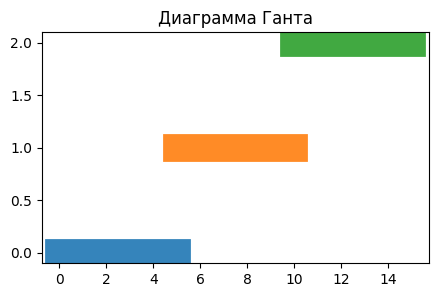

In [ ]:
import matplotlib.pyplot as plt

# Создаим пустой график
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Добавим на график линии
ax.plot([0,5], [0, 0], lw=20, alpha=0.9)
ax.plot([5,10], [1, 1], lw=20, alpha=0.9)
ax.plot([10,15], [2, 2], lw=20, alpha=0.9)

# Подпишем
ax.set_title("Диаграмма Ганта")

## Построим график на основе данных

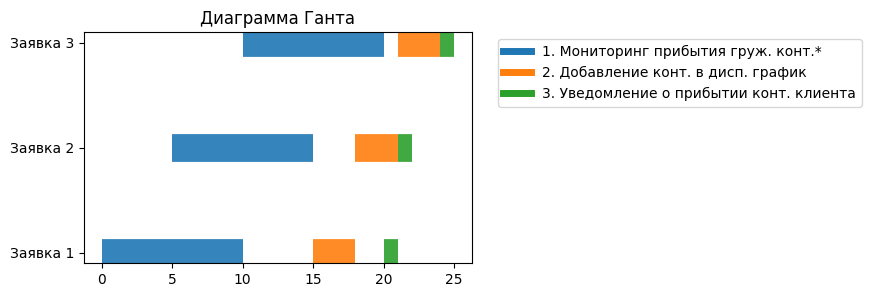

In [ ]:
import numpy as np # линейная алгебра
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def gant(df_data, lw=5, lh=3):

    # Добавлем колоноки в data_log
    df_data = pd.DataFrame(data_log, columns=["put", "beg", "end", "delay", "queue", "order", "oper"])
    df_data["index"] = df_data[["order", "oper"]].apply(lambda x: ", ".join(x), axis=1)

    ## Состави список заяок, операций
    orders = sorted(list(set(df_data["order"])))
    opers = sorted(list(set(df_data["oper"])))

    # Переичлим цвета для операций
    colors = []
    for i in enumerate(opers):
        colors.append(f"C{i[0]}")

    # Добавим график
    fig, ax = plt.subplots(1, 1, figsize=(lw, lh))

    # График с заявками
    for j, order in enumerate(orders): # для каждой заявки
        for i, oper in enumerate(opers): # для каждого события
            # Нанесем на график начальную и конечную точки операции
            for k in df_data[(df_data["order"]==order) & (df_data["oper"]==oper)].index:
                    ax.plot([df_data["beg"][k], df_data["end"][k]], [j, j],
                             colors[i], solid_capstyle="butt", lw=20, alpha=0.9)


    lines = [Line2D([0], [0], lw=lw, color=colors[i]) for i in range(len(opers))]
    ax.legend(lines, opers, bbox_to_anchor=(1.05, 1.0), loc="upper left")

    ax.set_title("Диаграмма Ганта")
    ax.set_yticks(range(len(orders)))
    ax.set_yticklabels(orders)

gant(data_log)

## Добавим время

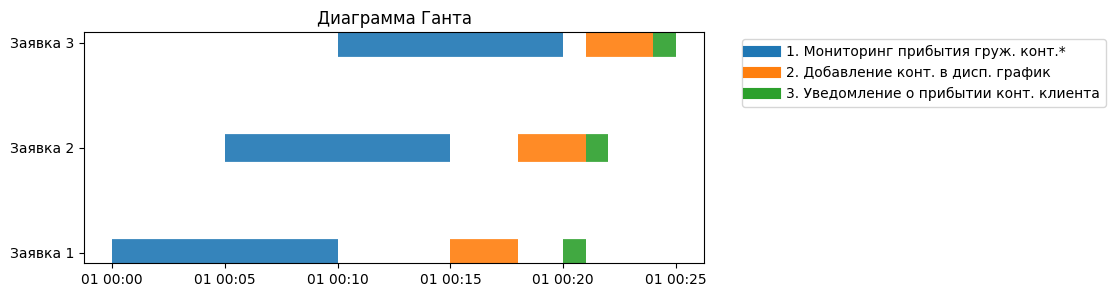

In [ ]:
import numpy as np # линейная алгебра
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import HourLocator, DateFormatter
from matplotlib.lines import Line2D
from datetime import datetime

def gant(df_data, lw=8, lh=3):

    g = 0
    fig, ax = plt.subplots(1, 1, figsize=(lw, lh))

    # Добавлем колоноки в data_log
    df_data = pd.DataFrame(data_log, columns=["put", "beg", "end", "wait", "queue", "order", "oper"])

    # Добавим время
    df_data['t_put'] = pd.to_datetime((df_data['put']).astype('int'), unit='m')
    df_data['t_beg'] = pd.to_datetime((df_data['beg']).astype('int'), unit='m')
    df_data['t_end'] = pd.to_datetime((df_data['end']).astype('int'), unit='m')

    orders = sorted(list(set(df_data["order"])))
    opers = sorted(list(set(df_data["oper"])))

    colors = []
    for i in enumerate(opers):
        colors.append(f"C{i[0]}")

    lim_min = pd.to_datetime((df_data['beg'].min()), unit='m')
    lim_max = pd.to_datetime((df_data['beg'].max()), unit='m')

    # График с заявками
    for j, order in enumerate(orders): # для каждой заявки
        for i, oper in enumerate(opers): # для каждого события
            # Нанесем на график начальную и конечную точки
            for k in df_data[(df_data["order"]==order) & (df_data["oper"]==oper)].index:
                    ax.plot([df_data["t_beg"][k], df_data["t_end"][k]], [j, j],
                             colors[i], solid_capstyle="butt", lw=20, alpha=0.9)


    lines = [Line2D([0], [0], lw=lw, color=colors[i]) for i in range(len(opers))]
    ax.legend(lines, opers, bbox_to_anchor=(1.05, 1.0), loc="upper left")

    ax.set_title("Диаграмма Ганта")
    ax.set_yticks(range(len(orders)))
    ax.set_yticklabels(orders)

gant(data_log)